# Retrieve WW3 model results for NDBC buoys location

All GRIB files can be retrieved from the directory ftp://polar.ncep.noaa.gov/pub/waves/. The GRIB directory format is YYYYMMDD.tHHz where YYYYMMDD is the date, tHHz is the run cycle identifier (t00z through t18z, respectively). The number of dates and cycles for which data are available may vary based upon available resources.

Alternatively, ftp://polar.ncep.noaa.gov/pub/waves/latest_run/ gives access to the most recent model results.

The file names for the GRIB files are model_ID.grib_ID.grb, where model_ID is a model identifier (nww3, akw, wna, nah or enp for global, Alaskan Waters Western North Atlantic, North Atlantic Hurricane and Easrern North Pacific model, respectively), and where grib_ID represents a GRIB identifier as in the table above. The file model_ID.all.grb contains all GRIB fields.

The global NWW3 model
The regional Alaskan Waters (AKW) model
The regional Western North Atlantic (WNA) model
The regional North Atlantic Hurricane (NAH) model
The regional Eastern North Pacific (ENP) model
The regional North Pacific Hurricane (NPH) model

# Examples of NWW3 Model Data Processing with Python

The following examples use Python to extract and visualize the sea surface height and ocean temperature in the NWW3 model using data from the NOMADS data server and a downloaded NWW3 GRiB2 file.

Prerequisites

The examples make use of the following free software:

Python
Numpy (Numerical Python
netcdf4-python: A Python/numpy interface for NetCDF and OpenDAP
Basemap: A module to plot data on map projections with matplotlib
pygrib (python module for reading GRiB files)
Example 1: Plot data from the NOMADS Data Server
Example 2: Plot data from an NWW3 GRiB2 file

In [2]:
'''Extract and plot data from the NOMADS Data Server'''

 # basic NOMADS OpenDAP extraction and plotting script
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import pandas as pd
import datetime as dt
import os

In [3]:
# set up the URL to access the data server.
# See the NWW3 directory on NOMADS 
# for the list of available model run dates.

#mydate='20160526'
mydate = dt.datetime.now().strftime('%Y%m%d')
#mydate = '20160520'
url='http://nomads.ncep.noaa.gov:9090/dods/wave/nww3/nww3'+ \
    mydate+'/nww3'+mydate+'_00z'

# Extract the significant wave height of combined wind waves and swell

nc = netCDF4.Dataset(url)
lat  = nc.variables['lat'][:]
lon  = nc.variables['lon'][:]
data_hs = nc.variables['htsgwsfc'][-1,:,:]
data_tp = nc.variables['perpwsfc'][-1,:,:]
time_var = nc.variables['time']
dtime = netCDF4.num2date(time_var[:],time_var.units)
#nc.close()

# Since Python is object oriented, you can explore the contents of the NOMADS
# data set by examining the file object, such as file.variables.

# The indexing into the data set used by netCDF4 is standard python indexing.
# In this case we want the first forecast step, but note that the first time 
# step in the RTOFS OpenDAP link is all NaN values.  So we start with the 
# second timestep

In [4]:
url

'http://nomads.ncep.noaa.gov:9090/dods/wave/nww3/nww320160528/nww320160528_00z'

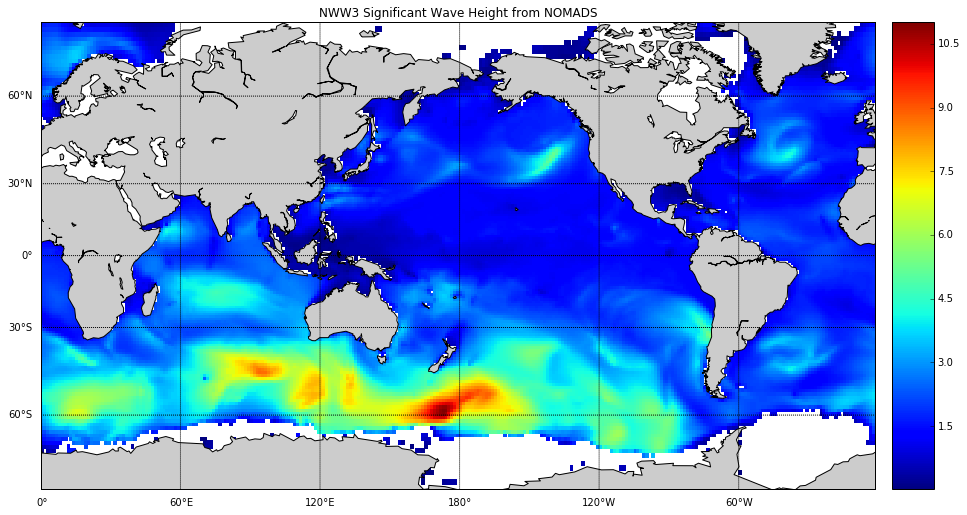

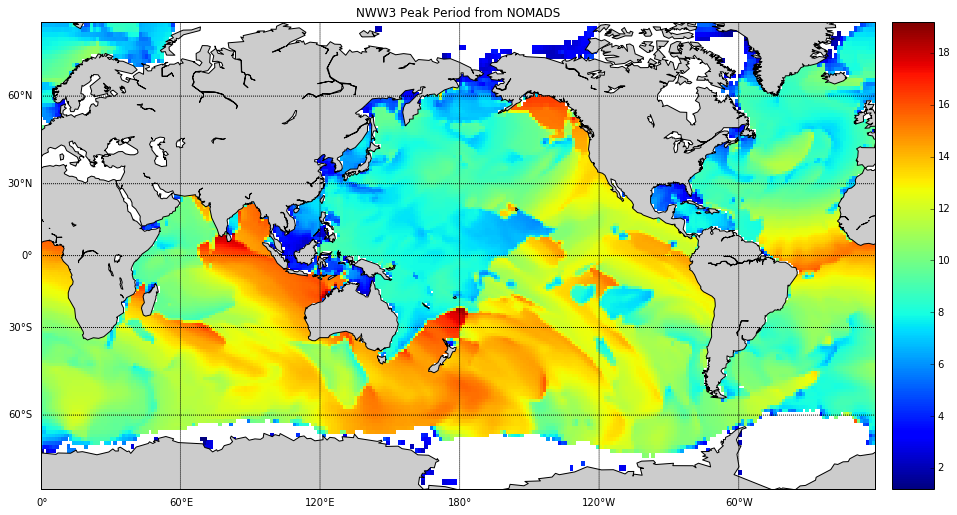

In [5]:
# Plot the field using Basemap.  Start with setting the map
# projection using the limits of the lat/lon data itself:

plt.figure(figsize=(16,14))

m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')

# convert the lat/lon values to x/y projections.

lons, lats = np.meshgrid(lon,lat)
# x, y = lons, lats
x, y = m(*np.meshgrid(lon,lat))

# plot the field using the fast pcolormesh routine 
# set the colormap to jet.

m.pcolormesh(x,y,data_hs,shading='flat',cmap=plt.cm.jet)
m.colorbar(location='right')

# Add a coastline and axis values.

m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

# Add a colorbar and title, and then show the plot.

plt.title('NWW3 Significant Wave Height from NOMADS')
plt.show()

#####################################################################

plt.figure(figsize=(16,14))

m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')

# convert the lat/lon values to x/y projections.

lons, lats = np.meshgrid(lon,lat)
# x, y = lons, lats
x, y = m(*np.meshgrid(lon,lat))

# plot the field using the fast pcolormesh routine 
# set the colormap to jet.

m.pcolormesh(x,y,data_tp,shading='flat',cmap=plt.cm.jet)
m.colorbar(location='right')

# Add a coastline and axis values.

m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

# Add a colorbar and title, and then show the plot.

plt.title('NWW3 Peak Period from NOMADS')
plt.show()

In [10]:
nc.variables.keys()

[u'time',
 u'lat',
 u'lon',
 u'dirpwsfc',
 u'dirswsfc',
 u'htsgwsfc',
 u'perpwsfc',
 u'perswsfc',
 u'ugrdsfc',
 u'vgrdsfc',
 u'wdirsfc',
 u'windsfc',
 u'wvdirsfc',
 u'wvpersfc']

In [197]:
first = netCDF4.num2date(time_var[0],time_var.units)
last = netCDF4.num2date(time_var[-1],time_var.units)
print first.strftime('%Y-%b-%d %H:%M')
print last.strftime('%Y-%b-%d %H:%M')

2016-May-20 00:00
2016-May-27 12:00


In [198]:
# determine what longitude convention is being used
print lon.min(),lon.max()

0.0 358.75


In [199]:
# Specify desired station time series location
# note we add 360 because of the lon convention in this dataset
#lati = 36.605; loni = -121.85899 + 360.  # west of Pacific Grove, CA
#lati = 41.4; loni = -67.8 +360.0  # Georges Bank
#lati = -55; loni = 30 +360.0  # Georges Bank
lati = 21.42; loni = -157.67 + 360 #NDBC Station 51202

In [200]:
# Function to find index to nearest point
def near(array,value):
    idx=(abs(array-value)).argmin()
    return idx

In [201]:
# Find nearest point to desired location (no interpolation)
ix = near(lon, loni)
iy = near(lat, lati)
print ix,iy

162 99


In [202]:
# Extract desired times.  

# 1. Select -+some days around the current time:
start = dt.datetime.utcnow()- dt.timedelta(days=3)
stop = dt.datetime.utcnow()+ dt.timedelta(days=3)
#       OR
# 2. Specify the exact time period you want:
#start = dt.datetime(2013,6,2,0,0,0)
#stop = dt.datetime(2013,6,3,0,0,0)

istart = netCDF4.date2index(start,time_var,select='nearest')
istop = netCDF4.date2index(stop,time_var,select='nearest')
print istart,istop

33 60


In [203]:
# Get all time records of variable [vname] at indices [iy,ix]
hs = nc.variables['htsgwsfc'][:,iy,ix]
tp = nc.variables['perpwsfc'][:,iy,ix]
dp = nc.variables['dirpwsfc'][:,iy,ix]
#hs = var[istart:istop,iy,ix]
#tim = dtime[istart:istop]
#hs = var1[:,iy,ix]
tim = dtime[:]

In [204]:
# Create Pandas time series object
ts = pd.DataFrame(np.array([hs, tp, dp]).T,index=pd.Series(tim, name='date'),columns=['hs', 'tp', 'dp'])

In [205]:

#title='Location: Lon=%.2f, Lat=%.2f' % ( lon[ix], lat[iy])


In [192]:
#write to a CSV file
ts.to_csv(os.environ['HOME'] + '/Dropbox/database/nww3/forecast/NWW3_NDBC_51202.csv')